Loading /home/facundoq/data/datasets/spectrogram/scans2023/Hu_1057_mu_Cen_mu Cen.png
0.15426868


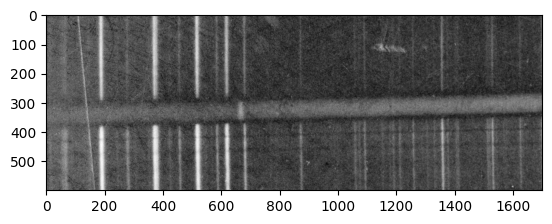

In [13]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = Path("/home/facundoq/data/datasets/spectrogram/scans2023/")

file = 10
files = list([x for x in folder.iterdir() if x.is_file()])

filepath = files[file]

print(f"Loading {filepath}")


image = 1-imread(filepath)[600:1200,500:2200]
print(image.min())
plt.imshow(image,cmap="gray")



Text(0.5, 1.0, 'Original vs smoothed, window=18, order=2')

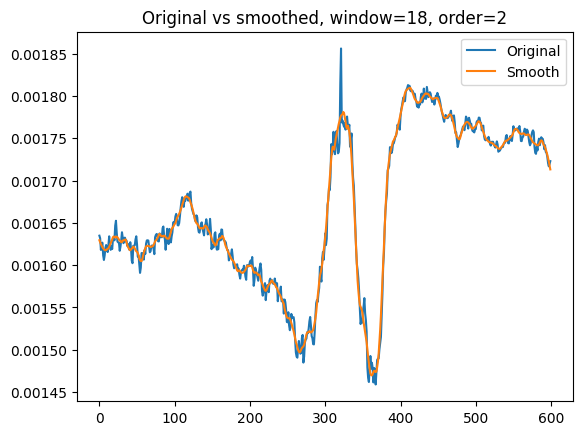

In [14]:
from scipy.signal import savgol_filter
x = np.arange(image.shape[0]).reshape(-1,1)
y = (image.max(axis=1)*0.2+image.mean(axis=1)*0.8)
y = y/y.sum()
plt.plot(x,y,label="Original")
n,d=x.shape
#smoothing
window_size = int(n*0.03)
polyorder = 2
y = savgol_filter(y,window_size,polyorder)
y = y/y.sum()
plt.plot(x,y,label="Smooth")
plt.legend()
plt.title(f"Original vs smoothed, window={window_size}, order={polyorder}")


[115 324 413]


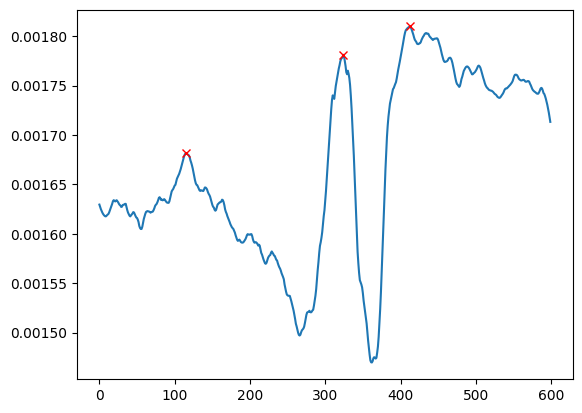

In [15]:
from scipy.signal import find_peaks,savgol_filter
def find_spectra(x,y):
    y = y
    n,d = x.shape
    prominence = y.mean()/5
    
    peaks, _ = find_peaks(y, distance=n*0.01,height=y.mean(),prominence=y.std()*0.7)
    plt.plot(x,y)
    return peaks

peaks = find_spectra(x,y)
# plt.plot(x,y)
plt.plot(peaks, y[peaks], "xr");
print(peaks) 


In [16]:
def pdf_to_samples(x,y,n_samples,smoothing=0.1,jitter=0.2):
    y=y+smoothing
    y/=y.sum()
    samples = []
    for xi,yi in zip(x,y):
        nx = int(np.round(yi*n_samples)[0])
        samples+= [xi+np.random.normal(scale=jitter) for i in range(nx)]
    print(len(samples))
    return np.array(samples)
def sample_pdf(x,y,n):
    y = np.cumsum(y)
    probs = np.random.uniform(size=n)
    
    
s = pdf_to_samples(x,y,10000)
plt.hist(s,bins=500)
plt.show()


IndexError: invalid index to scalar variable.

  0%|          | 0/10 [00:00<?, ?it/s]

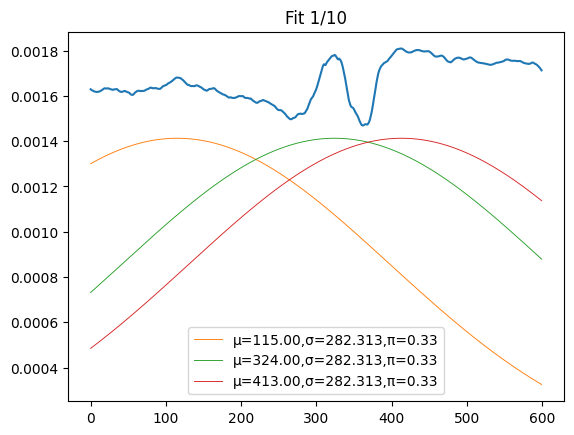

0 600
[[0.51678914 0.29062562 0.19258524]
 [0.51602309 0.2909568  0.19302011]
 [0.51525688 0.29128762 0.19345549]
 ...
 [0.13958154 0.37561864 0.48479982]
 [0.13919148 0.3755525  0.48525603]
 [0.13880229 0.37548579 0.48571192]]


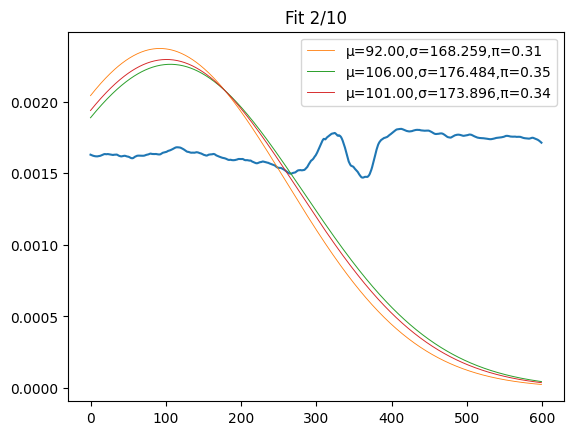

0 600
[[0.32140433 0.34252364 0.33607203]
 [0.32137736 0.34254807 0.33607457]
 [0.32134978 0.34257297 0.33607725]
 ...
 [0.21184307 0.43888342 0.34927351]
 [0.21154403 0.43917418 0.34928179]
 [0.21124482 0.43946531 0.34928987]]


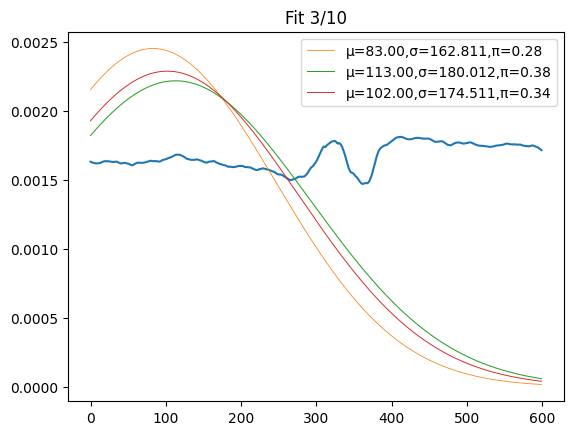

0 600
[[0.3094145  0.35238958 0.33819592]
 [0.30935224 0.35244532 0.33820244]
 [0.30928872 0.35250205 0.33820923]
 ...
 [0.11411957 0.5463292  0.33955123]
 [0.11372058 0.54685147 0.33942795]
 [0.11332215 0.54737398 0.33930387]]


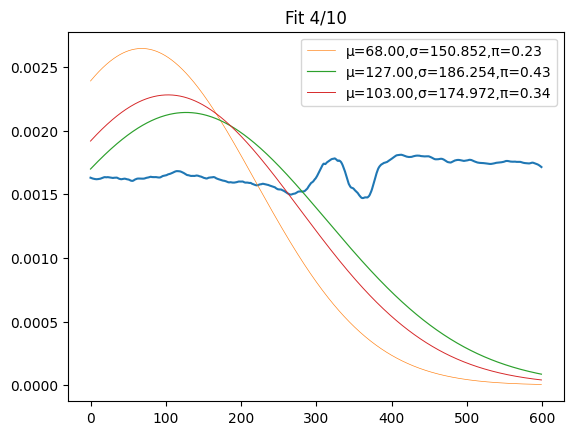

0 600
[[0.28392496 0.3738134  0.34226164]
 [0.28381566 0.3739238  0.34226054]
 [0.28370368 0.37403631 0.34226002]
 ...
 [0.02417686 0.70349739 0.27232575]
 [0.02396583 0.70415771 0.27187647]
 [0.02375623 0.70481738 0.27142639]]


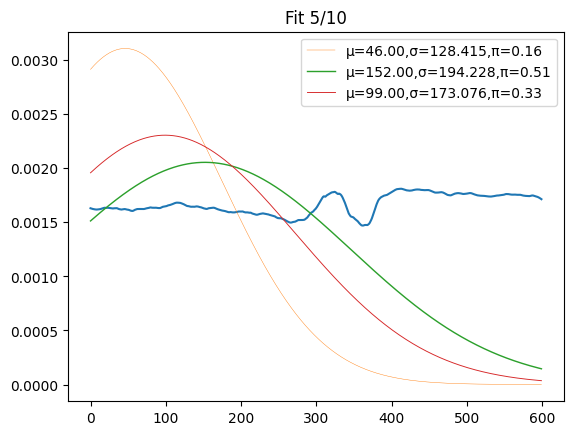

0 600
[[2.41859697e-01 4.10616962e-01 3.47523341e-01]
 [2.41690443e-01 4.10845632e-01 3.47463925e-01]
 [2.41515569e-01 4.11078695e-01 3.47405736e-01]
 ...
 [5.51868432e-04 8.60618922e-01 1.38829209e-01]
 [5.40425432e-04 8.61205438e-01 1.38254136e-01]
 [5.29200551e-04 8.61790583e-01 1.37680216e-01]]


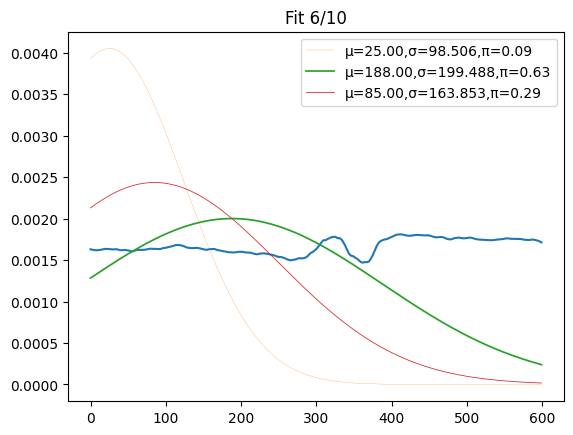

0 600
[[1.93977635e-01 4.59620313e-01 3.46402052e-01]
 [1.93740916e-01 4.60064336e-01 3.46194747e-01]
 [1.93492973e-01 4.60517276e-01 3.45989751e-01]
 ...
 [1.05367381e-07 9.66836212e-01 3.31636823e-02]
 [1.00387087e-07 9.67117187e-01 3.28827122e-02]
 [9.56345409e-08 9.67396244e-01 3.26036601e-02]]


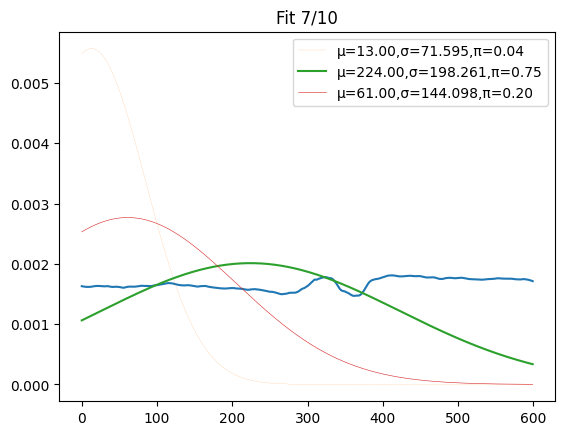

0 600
[[1.55671019e-01 5.11682054e-01 3.32646926e-01]
 [1.55387848e-01 5.12412553e-01 3.32199599e-01]
 [1.55083795e-01 5.13160357e-01 3.31755848e-01]
 ...
 [3.40760766e-15 9.97822961e-01 2.17703922e-03]
 [3.06950597e-15 9.97858160e-01 2.14183994e-03]
 [2.76448014e-15 9.97892839e-01 2.10716081e-03]]


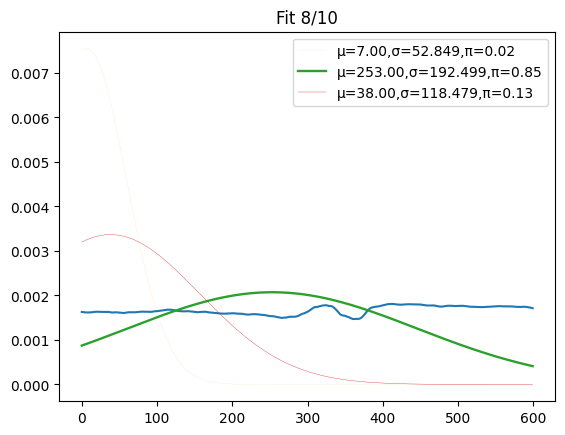

0 600
[[1.33378178e-01 5.54842418e-01 3.11779404e-01]
 [1.33031980e-01 5.55890821e-01 3.11077199e-01]
 [1.32649818e-01 5.56970831e-01 3.10379351e-01]
 ...
 [4.35807596e-28 9.99981949e-01 1.80512019e-05]
 [3.56051803e-28 9.99982492e-01 1.75078879e-05]
 [2.90795580e-28 9.99983020e-01 1.69801751e-05]]


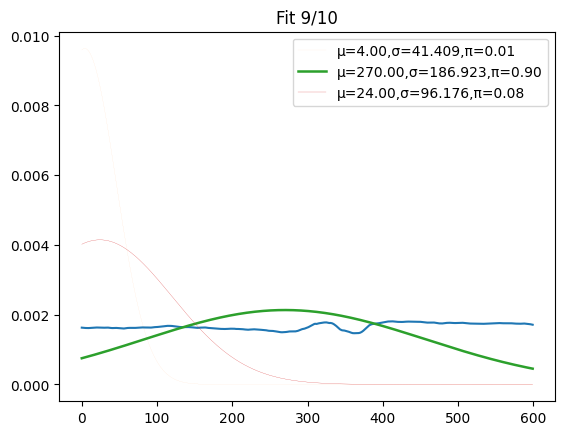

0 600
[[1.20849633e-01 5.90981706e-01 2.88168661e-01]
 [1.20427468e-01 5.92267077e-01 2.87305455e-01]
 [1.19950133e-01 5.93604184e-01 2.86445683e-01]
 ...
 [9.81342131e-46 9.99999984e-01 1.60401895e-08]
 [7.00762849e-46 9.99999985e-01 1.52178460e-08]
 [5.00127629e-46 9.99999986e-01 1.44365145e-08]]


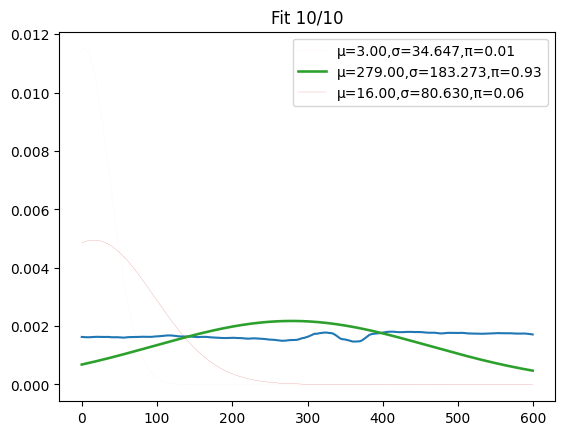

0 600
[[1.12685858e-01 6.19806024e-01 2.67508118e-01]
 [1.12243514e-01 6.21218085e-01 2.66538401e-01]
 [1.11725900e-01 6.22704502e-01 2.65569598e-01]
 ...
 [3.86380051e-65 1.00000000e+00 3.30529447e-12]
 [2.37713455e-65 1.00000000e+00 3.05128420e-12]
 [1.46131546e-65 1.00000000e+00 2.81644510e-12]]


In [19]:

from scipy.stats import norm
from tqdm.auto import tqdm
from IPython.display import clear_output


class GMMPlotCallback:

    def __init__(self) -> None:
        self.ax=None
    def __call__(self,gmm,x,y,step,steps):
        # if self.ax is None:
        f,self.ax = plt.subplots(1)
        # self.ax.clear()
        # clear_output(wait=True)    

        self.ax.plot(x,y)
        
        for i in range(gmm.k):
            distribution = norm(loc=gmm.mu[i],scale=gmm.sigma[i])
            self.ax.plot(x,distribution.pdf(x),linewidth=2*gmm.pi[i],label = f"μ={gmm.mu[i]:.2f},σ={gmm.sigma[i]:.3f},π={gmm.pi[i]:.2f}")
        if gmm.k<5:
            plt.legend()
        plt.title(f"Fit {step+1}/{steps}")
        plt.show()


class GMM:

    @classmethod
    def random_initialize(klass,k,x,y,mu=None,sigma=None,pi=None):
        if mu is None:
            indices = np.random.randint(0,high=x.shape[0],size=k)
            mu = x[indices,:]
            # print("Initial mu = ",self.mu)
        if sigma is None:
            sigma = np.ones(k)*20
            sigma *= np.sqrt(np.mean((x**2)*y)-np.mean(x*y)**2)
                
        if pi is None:
            pi=np.zeros(k)+(1/k)
        # # check dist
        # total = np.zeros(k)
        # for i in range(k):
        #     dist = norm(loc=mu[i],scale=sigma[i])
        #     total[i] = dist.pdf(x).sum()
        
        
        return GMM(mu,sigma,pi)
    
    def __init__(self,mu,sigma,pi):
        self.mu=mu
        self.sigma= sigma
        self.pi=pi

    @property
    def k(self):
        return self.pi.shape[0]
    
    def fit(self,x,y,steps,callbacks=[]):
        
        n,m = x.shape
        z = np.zeros( (n,self.k))
        for i in tqdm(range(steps)):
            # print(self)            
            for callback in callbacks:
                callback(self,x,y,i,steps)
            #E step
            z = self.e_step(x,y,z)
            self.m_step(x,y,z)
            
    def e_step(self,x,y,z):
        distributions = [norm(loc=mu,scale=sigma) for mu,sigma in zip(self.mu,self.sigma)]

        for i in range(self.k):
            val = distributions[i].pdf(x)[:,0]*y*self.pi[i]
            z[:,i] = val.squeeze()
        zsum = z.sum(axis=1)
        z[zsum<1e-20,:]=1/self.k
        print(np.sum(zsum<1e-10),x.shape[0])
        zsum = z.sum(axis=1,keepdims=True)
        z/=zsum
        print(z)
        return z
        
    def m_step(self,x,y,z):
        
        self.pi=z.mean(axis=0)
        for i in range(self.k):
            self.mu[i] = np.mean(x * z[:,i])
            self.sigma[i] = np.sqrt(np.mean((x**2)*z[:,i])-np.mean(x*z[:,i])**2)

    def __repr__(self) -> str:
        result = ""
        for i in range(self.k):
            result+= f"Component {i}: π={self.pi[i]:.2f}, μ={self.mu[i]:.2f}, σ={self.sigma[i]:.2f}\n"
        return result

gmm = GMM.random_initialize(3,x,y,mu=peaks.copy())
# print(f"Initialization:\n {gmm}")
plot_cb =GMMPlotCallback()
gmm.fit(x,y,10,callbacks=[plot_cb])


# print(f"Final result:\n {gmm}")

In [111]:
def estimate_axis(x,window_size):
    assert window_size % 2 == 1
    half_window = window_size//2
    n,m=x.shape  

    top = np.zeros(m,2)
    middle = np.zeros(m,2)
    bottom = np.zeros(m,2)
    for i in range(m-window_size):
        l,r = i-half_window,i+half_window
        window = x[:,l:r]
        signal = window.mean(axis=1)
        
    for i in range(half_window +1):
        top[i,:]=top[half_window +1,:]
        middle[i,:]=top[half_window +1,:]
        bottom[i,:]=top[half_window +1,:]
        
                





from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3).fit(y)
for mean,var in zip(gm.means_,gm.covariances_):
    print(mean,var)




[0.632371] [[0.00062744]]
[0.49984612] [[0.0008132]]
[0.70248223] [[0.00028308]]


In [20]:
def pdf_to_samples(x,y,n_samples,smoothing=0):
    y=y+smoothing
    y/=y.sum()
    samples = []
    for xi,yi in zip(x,y):
        nx = int(np.round(yi*n_samples)[0])
        samples+= [xi]*nx
    print(len(samples))
    return np.array(samples)

s = pdf_to_samples(x,y,1000000)
plt.hist(s,bins=600)
plt.show()


IndexError: invalid index to scalar variable.